Data Evaluation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Reads data
df = pd.read_csv("../Data/logbook_assignment1.csv")
df.shape
df.info()
df.describe()
df.head()

C:\Users\ruaan\AppData\Local\Temp\ipykernel_2084\3040464118.py:5: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/logbook_assignment1.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174870 entries, 0 to 1174869
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date_fueled      1125665 non-null  object
 1   date_captured    1174870 non-null  object
 2   odometer         1025716 non-null  object
 3   gallons          1100660 non-null  object
 4   cost_per_gallon  1094110 non-null  object
 5   total_spent      1100660 non-null  object
 6   mpg              1100660 non-null  object
 7   miles            146274 non-null   object
 8   user_url         1174870 non-null  object
dtypes: object(9)
memory usage: 80.7+ MB


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


All the columns are in string format, even the numeric ones. Theres missing values in most of the columns. Some of the cilumns formats are wrong, like data fuel. Some cols have text and numbers.

Question 1.1 - 1
Identify what percentage of date_fueled entries are not proper dates

In [2]:
Dates = pd.to_datetime(df['date_fueled'], errors='coerce')
Nat_values = Dates.isna() #counts no. of trues
Nat_count = Nat_values.sum()
Total_count = len(df)
percentage = (Nat_count/Total_count)*100
print(f"Invalid date_fueled entries: {percentage:.2f}%") 

C:\Users\ruaan\AppData\Local\Temp\ipykernel_2084\583575098.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Dates = pd.to_datetime(df['date_fueled'], errors='coerce')


Invalid date_fueled entries: 11.66%


The amount of dates that are not proper dates in date_fueled, is 11.66%. Meaning that 11.66% of the dates are Nat.
 

Question 1.1 - 2 If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy. 

In [3]:
df['date_captured'] = pd.to_datetime(df['date_captured'], errors = 'coerce')
intersection = df['date_fueled'].isna() & df['date_captured'].notna()
df.loc[intersection, 'date_fueled'] == df.loc[intersection, 'date_captured']
df['date_fueled'].head()

0    Cooling System, Heating System, Lights, Spark ...
1                                           Nov 7 2012
2                                          Sep 22 2012
3                                           May 4 2019
4                                          Feb 15 2022
Name: date_fueled, dtype: object

Converted date_captured to date format, then found all the rows where date_fueled had no values or NaT, while date_captured had a value, and changed it to date capture using df.loc

Question 1.1 - 3 Convert the column to a date format, setting any invalid date fueled entries
to NaT.


In [4]:
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors = 'coerce')
print(df['date_fueled'].head(10))

C:\Users\ruaan\AppData\Local\Temp\ipykernel_2084\2349755765.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors = 'coerce')


0          NaT
1   2012-11-07
2   2012-09-22
3   2019-05-04
4   2022-02-15
5   2021-10-23
6   2021-11-20
7   2022-01-20
8          NaT
9          NaT
Name: date_fueled, dtype: datetime64[ns]


The date_fueled column was converted to datetime format. Any entries that were not proper dates were set to NaT.

Question 1.1 - 4 Remove dates that are in the future, or dates that are earlier than 2005.

In [5]:
min = pd.Timestamp('2005-01-01')
max = pd.Timestamp.today()
print("before: ", len(df['date_fueled']))
df = df[(df['date_fueled']>=min) & (df['date_fueled']<=max)]
print("after: ", len(df['date_fueled']))

before:  1174870
after:  1037174


Question 1.1 - 5 Plot the distribution of fueling dates and comment on the results.

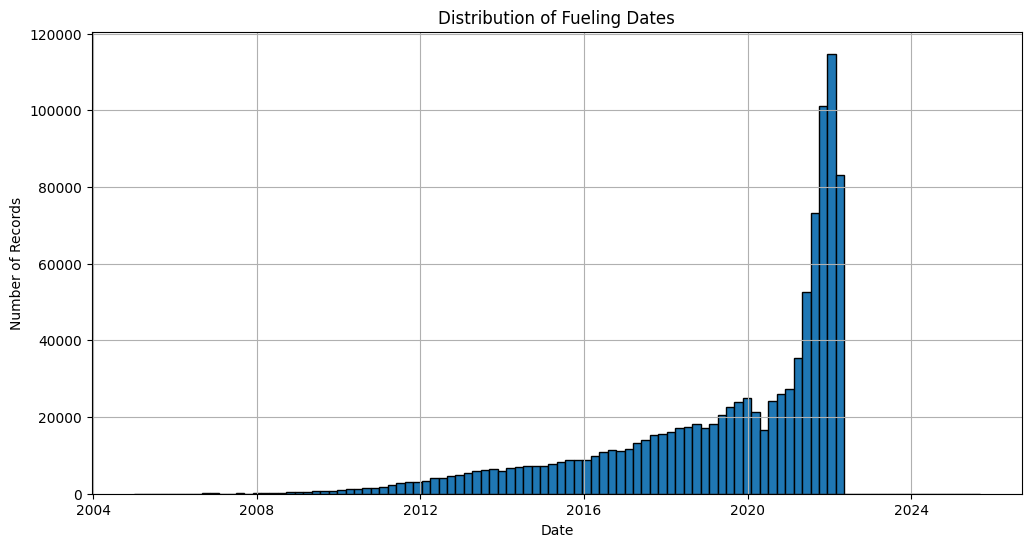

In [6]:
plt.figure(figsize=(12,6))
df['date_fueled'].hist(bins=100, edgecolor='black')

plt.title("Distribution of Fueling Dates")
plt.xlabel("Date")
plt.ylabel("Number of Records")
plt.show()

The distribution of fueling dates shows that most records are concentrated in recent years (e.g., around 2020 onwards). Earlier dates have fewer records, likely because fewer users were logging their fuel data at that time. There are no obvious spikes beyond today's date, confirming that invalid future entries were successfully removed. Also we can see that most records of fuel were more recent from 2021 until 2022 - 2023.